In [1]:
import pandas as pd
dt = pd.read_csv('training_data.csv')
dt['id']=dt['id'].fillna(" ")
dt['headline']=dt['headline'].fillna(" ")
dt['written_by']=dt['written_by'].fillna(" ")
dt['news']=dt['news'].fillna(" ")
dt['label']=dt['label'].fillna(" ")
dt.dropna(axis=1)

C:\Users\Lasya Priya D\AppData\Local\Temp\ipykernel_11196\154193501.py:2: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,

,id,headline,written_by,news,label
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,0
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€ while discu...",0
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1
...,...,...,...,...,...
9616,9207,YOUTUBE BANS â€˜CLINTONâ€™S BLACK SONâ€™,Iron Sheik,Home â€º US NEWS â€º YOUTUBE BANS â€˜CLINTONâ€...,1
9617,4444,The Sex Scandal That Could Change The Election,Jason Bermas,We Are Change \nWith only days away from the m...,1
9618,5822,Trump Releases New TV Ad that Uses Anthony Wei...,LN Buzz Team,A candidate under FBI investigation? Check.\nA...,1
9619,12732,"Michael Flynn, Kim Jong-un: Your Tuesday Eveni...",Karen Zraick and Lisa Iaboni,(Want to get this briefing by email? Hereâ€™s ...,0


In [3]:
#A1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
 
dt['news']=dt['news'].fillna('')
x=dt['news']
y=dt['label']


train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=50)
merged_x=pd.concat([train_x,test_x],axis=0,ignore_index=True)
vectorize=CountVectorizer()
merged_x_vect=vectorize.fit_transform(merged_x)
df_without_labels=dt.drop(columns=['label'])

x_train_vect=vectorize.fit_transform(train_x)
x_test_vect=vectorize.transform(test_x)

k=3
kmeans_cluster=KMeans(n_clusters=k,random_state=50)
kmeans_cluster.fit(merged_x_vect)

df_without_labels['clusters']=kmeans_cluster.labels_

df_without_labels.dropna(axis=1)


C:\Users\Lasya Priya D\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,id,headline,written_by,news,clusters
0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON â€” In Sonny Perdueâ€™s telling,...",0
1,10041,U.S. Must Dig Deep to Stop Argentinaâ€™s Lione...,David Waldstein,HOUSTON â€” Venezuela had a plan. It was a ...,2
2,19113,Cotton to House: â€™Do Not Walk the Plank and ...,Pam Key,"Sunday on ABCâ€™s â€œThis Week,â€ while discu...",2
3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. â€” The beleaguered Republican...",0
4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,0
...,...,...,...,...,...
9616,9207,YOUTUBE BANS â€˜CLINTONâ€™S BLACK SONâ€™,Iron Sheik,Home â€º US NEWS â€º YOUTUBE BANS â€˜CLINTONâ€...,0
9617,4444,The Sex Scandal That Could Change The Election,Jason Bermas,We Are Change \nWith only days away from the m...,0
9618,5822,Trump Releases New TV Ad that Uses Anthony Wei...,LN Buzz Team,A candidate under FBI investigation? Check.\nA...,2
9619,12732,"Michael Flynn, Kim Jong-un: Your Tuesday Eveni...",Karen Zraick and Lisa Iaboni,(Want to get this briefing by email? Hereâ€™s ...,2


C:\Users\Lasya Priya D\AppData\Local\Temp\ipykernel_11196\3511230355.py:10: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,26

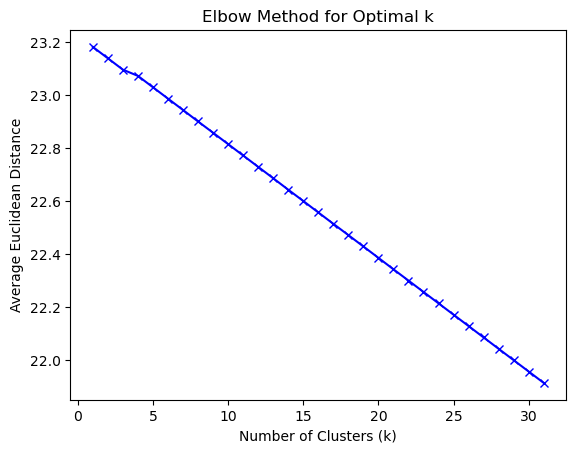

In [4]:
#A2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

dt = pd.read_csv('training_data.csv')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dt)

# Standardize the features
scaler = StandardScaler(with_mean=False)
X_std = scaler.fit_transform(X)

# Initialize distortions list to store average Euclidean distances
distortions = []

# Range of k values
K_values = range(1, 32)

# Calculate distortions for each k
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_std)
    distortions.append(sum(np.min(cdist(X_std.toarray(), kmeans.cluster_centers_, 'euclidean'), axis=1)) / X_std.shape[0])

# Plot the elbow
plt.plot(K_values, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.title('Elbow Method for Optimal k')
plt.show()

#K=3 is ideal value of k for our dataset

C:\Users\Lasya Priya D\AppData\Local\Temp\ipykernel_11196\246077635.py:8: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,

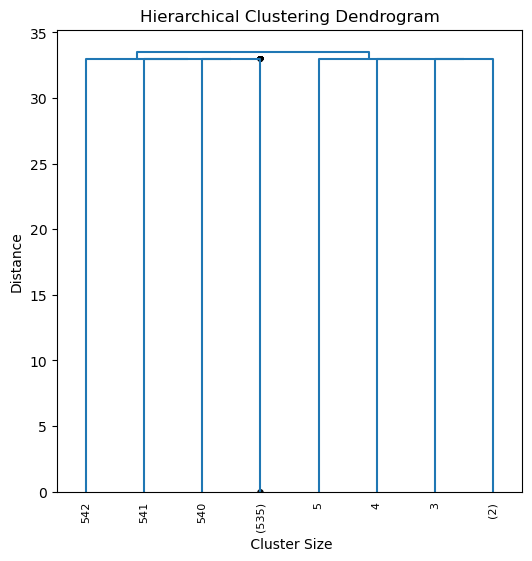

In [5]:
#A3
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

dt=pd.read_csv("training_data.csv")

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dt)

# Standardize the features
scaler = StandardScaler(with_mean=False)
X_std = scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_std.toarray(), method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(6, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel(' Cluster Size')
plt.ylabel('Distance')
plt.show()


C:\Users\Lasya Priya D\AppData\Local\Temp\ipykernel_19696\2326720920.py:10: DtypeWarning: Columns (15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,26

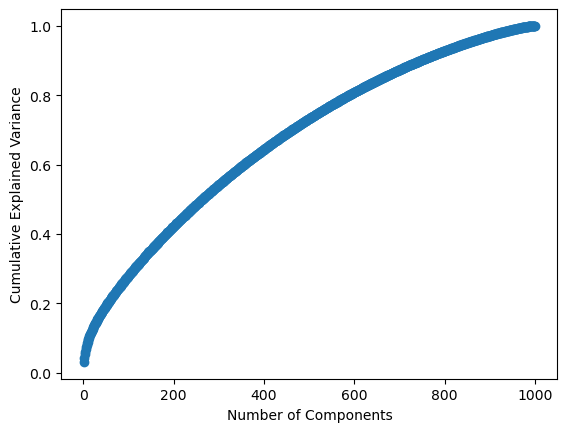

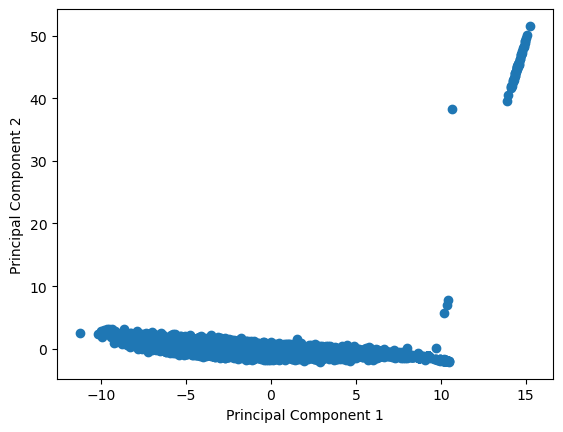

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



text_data = pd.read_csv('training_data.csv')

text_data['news'].fillna('', inplace=True)

corpus = text_data['news'].tolist()




vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
X_text = vectorizer.fit_transform(corpus).toarray()




scaler = StandardScaler()
X_text_standardized = scaler.fit_transform(X_text)

# Create a PCA object
pca = PCA()

# Fit and transform the standardized TF-IDF data
X_text_pca = pca.fit_transform(X_text_standardized)



# Plot the explained variance ratio to decide the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


n_components = 50 

pca = PCA(n_components=n_components)

# Fit and transform the data with the selected number of components
X_text_pca = pca.fit_transform(X_text_standardized)


plt.scatter(X_text_pca[:, 0], X_text_pca[:, 1])  
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
